In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load dataset
data = load_diabetes()
X = data.data[:, np.newaxis, 2]  # BMI feature (3rd column)
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:

# Step 2: Implement Batch Gradient Descent
def gradient_descent(X, y, lr=0.1, iterations=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    theta = np.zeros(2)  # [theta0, theta1]
    cost_history = []

    for _ in range(iterations):
        predictions = X_b.dot(theta)
        errors = predictions - y
        gradients = (1/m) * X_b.T.dot(errors)
        theta -= lr * gradients
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)
    return theta, cost_history

# Train with Gradient Descent
theta_gd, cost_history = gradient_descent(X_train, y_train, lr=0.1, iterations=500)

In [13]:
# Step 3: Evaluate on test set
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]
y_pred_gd = X_test_b.dot(theta_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)

In [7]:
# Step 4: Closed-form solution (Normal Equation)
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
theta_ne = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Add bias term to X_test
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]

y_pred_ne = X_test_b.dot(theta_ne)
mse_ne = mean_squared_error(y_test, y_pred_ne)

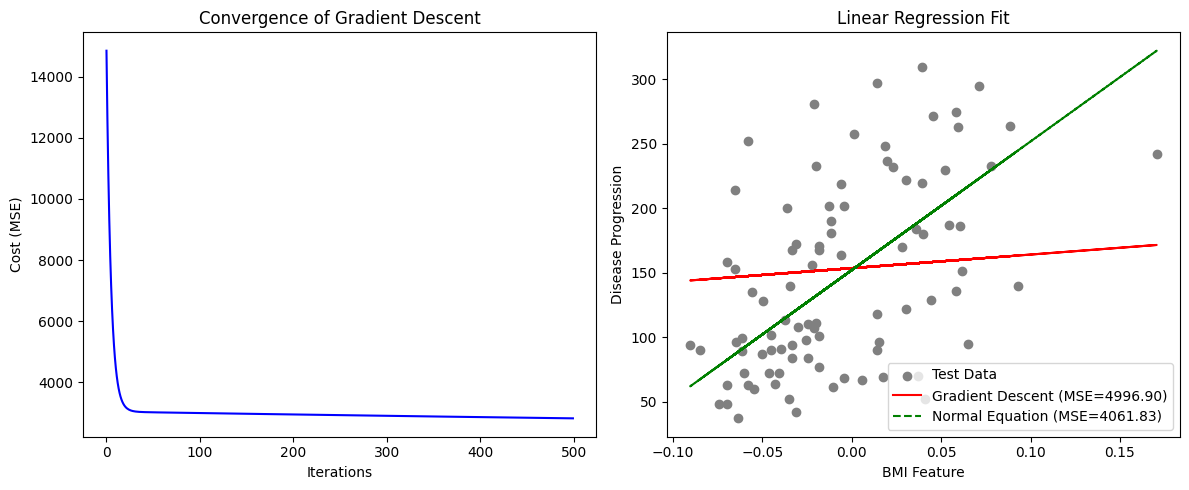

Gradient Descent Parameters: [153.55681252 105.5469533 ]
Normal Equation Parameters: [152.00335421 998.57768914]
Test MSE (Gradient Descent): 4996.90
Test MSE (Normal Equation): 4061.83


In [11]:
# Step 5: Visualization
plt.figure(figsize=(12, 5))

# Plot cost vs iterations
plt.subplot(1, 2, 1)
plt.plot(cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Convergence of Gradient Descent')

# Calculate predictions and MSE for Gradient Descent on test set
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test] # Add bias term to X_test
y_pred_gd = X_test_b.dot(theta_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)


# Plot regression lines
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='gray', label="Test Data")
plt.plot(X_test, y_pred_gd, color='red', label=f"Gradient Descent (MSE={mse_gd:.2f})")
plt.plot(X_test, y_pred_ne, color='green', linestyle='--', label=f"Normal Equation (MSE={mse_ne:.2f})")
plt.xlabel('BMI Feature')
plt.ylabel('Disease Progression')
plt.title('Linear Regression Fit')
plt.legend()

plt.tight_layout()
plt.show()

# Print results
print("Gradient Descent Parameters:", theta_gd)
print("Normal Equation Parameters:", theta_ne)
print(f"Test MSE (Gradient Descent): {mse_gd:.2f}")
print(f"Test MSE (Normal Equation): {mse_ne:.2f}")